In [20]:
!pip install -q yfinance
!pip install pandas_datareader

### Импорт библиотек и подготовка датасета

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

df.tail(10)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-27,126.199997,130.020004,125.519997,127.739998,127.739998,125309300,AMAZON
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500,AMAZON
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400,AMAZON
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,AMAZON
2023-11-02,138.729996,138.809998,136.470001,138.070007,138.070007,52236700,AMAZON
2023-11-03,138.990005,139.490005,137.449997,138.600006,138.600006,44007200,AMAZON
2023-11-06,138.759995,140.729996,138.360001,139.740005,139.740005,44970400,AMAZON
2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMAZON
2023-11-08,142.970001,143.119995,141.220001,142.080002,142.080002,44521700,AMAZON


### Описательная статистика

In [22]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,161.765746,163.713340,160.047097,161.966839,161.177073,7.725393e+07
std,16.194321,15.978362,16.369353,16.169774,16.281613,2.694372e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,148.864998,150.650002,147.264999,149.075005,148.313545,5.695555e+07
50%,163.059998,165.279999,160.889999,163.619995,162.210968,7.159840e+07
75%,174.004997,175.815002,172.440002,174.584999,173.525932,9.007030e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.954327e+08


In [23]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-11-10 to 2023-11-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   company_name  503 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


### Данные на момент закрытия биржи

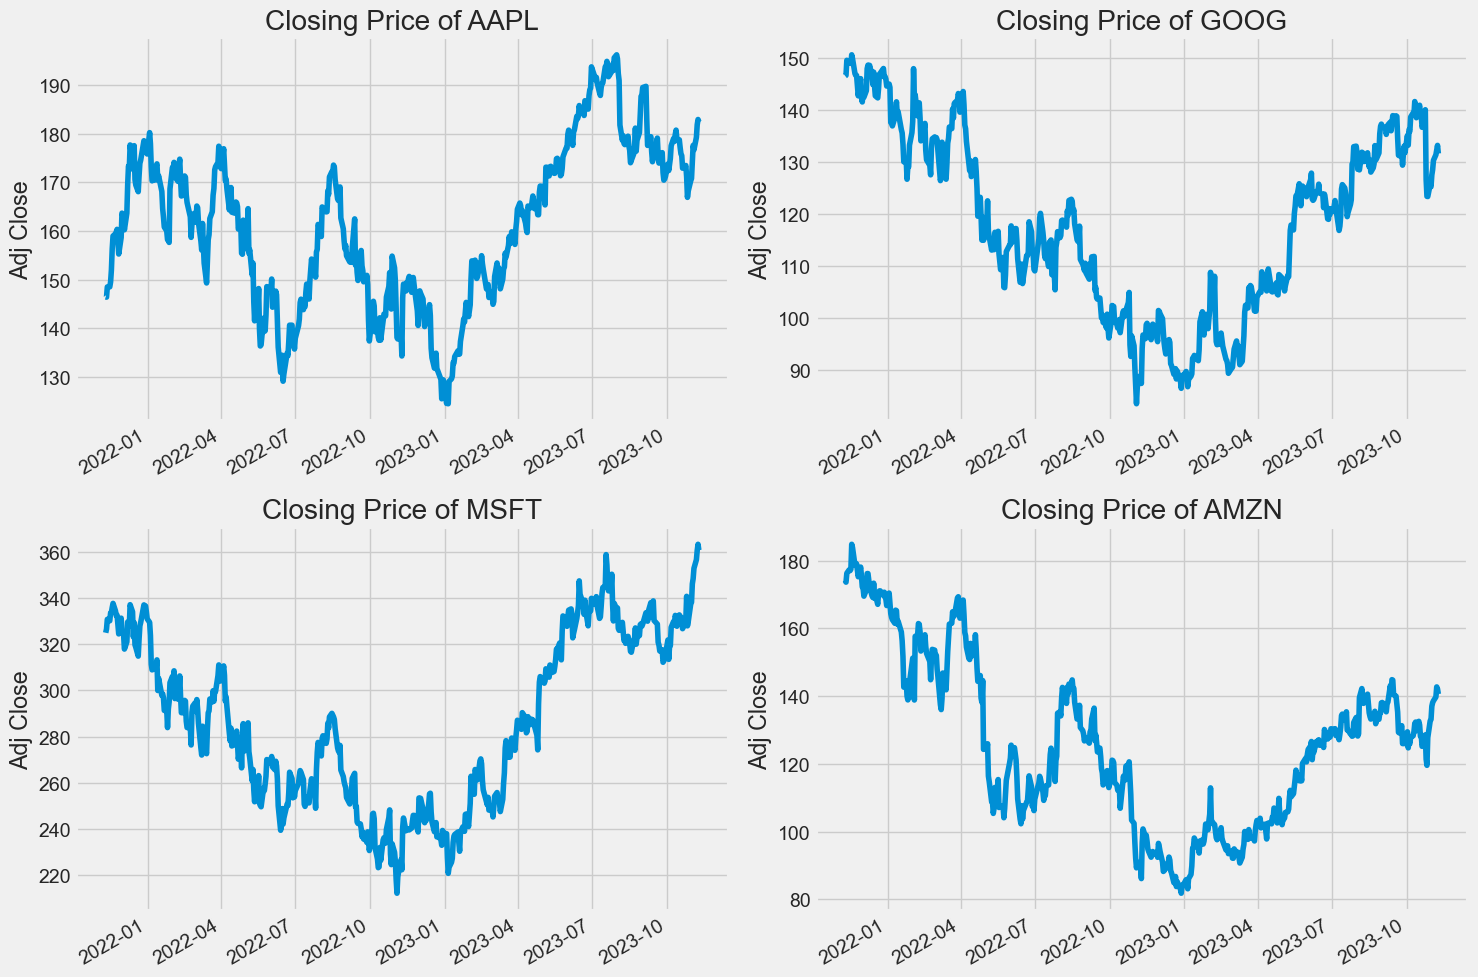

In [24]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

### Данные об объеме торгов

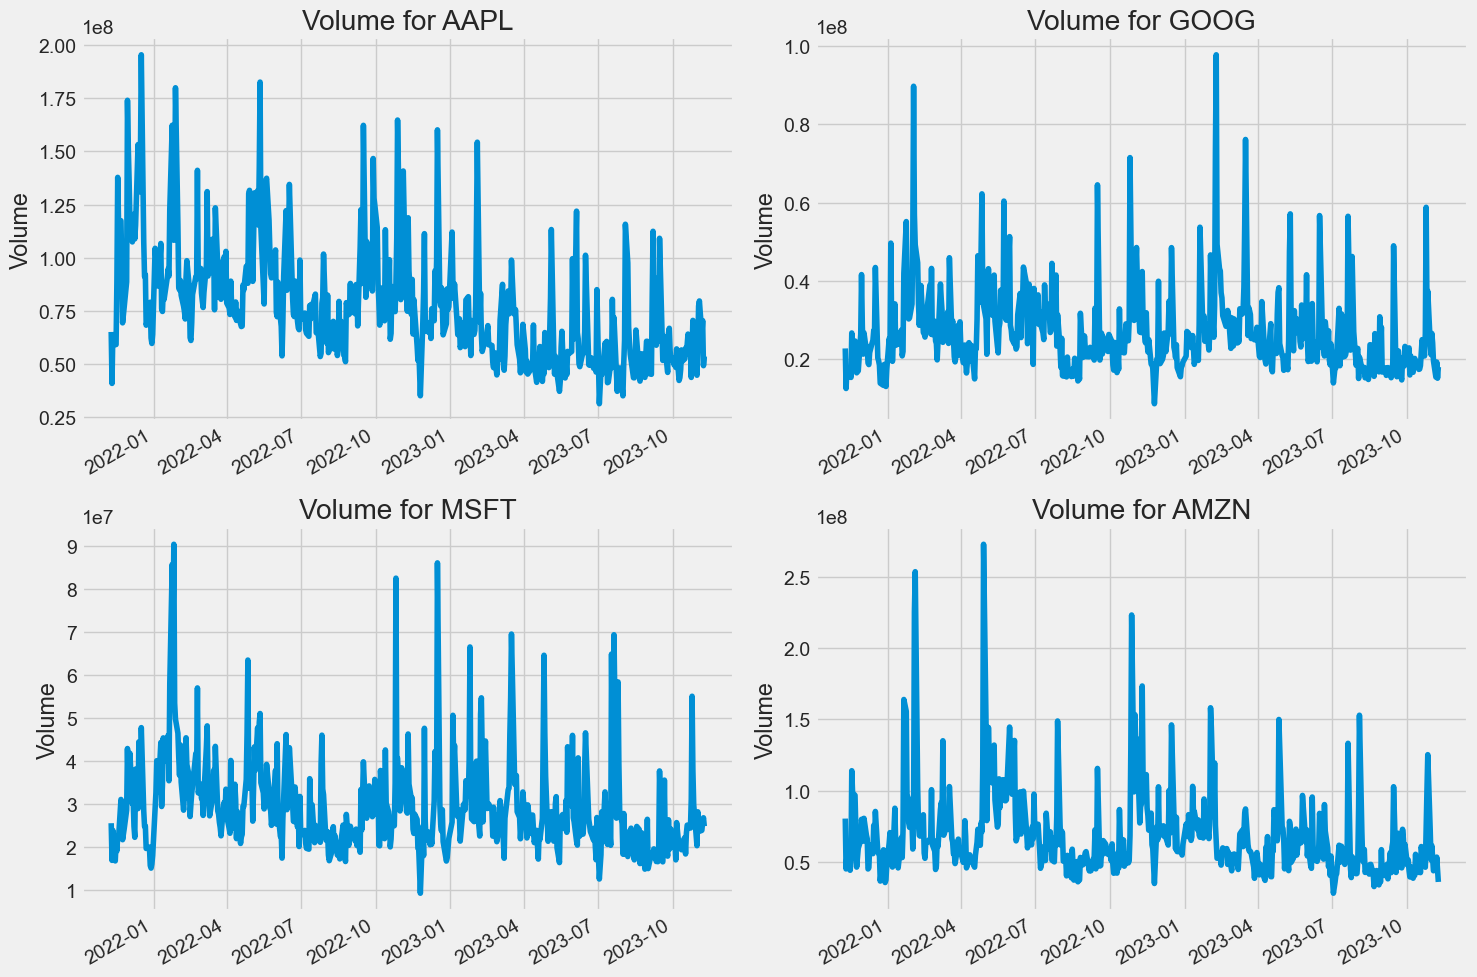

In [25]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Volume for {tech_list[i-1]}")

plt.tight_layout()

### Модель MA (moving average) скользящее среднее

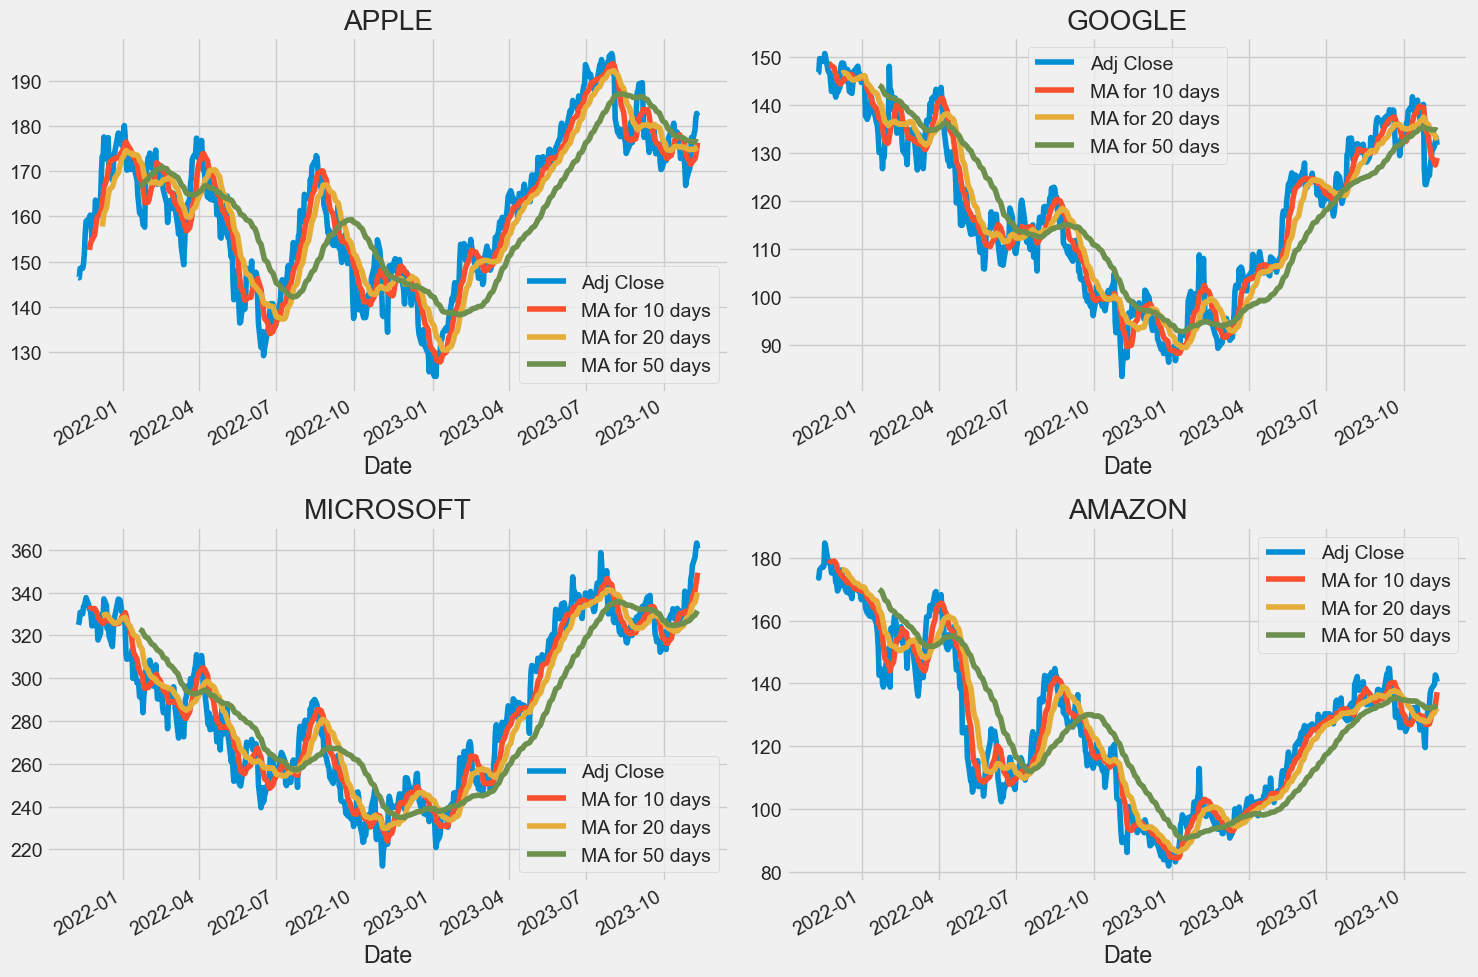

In [28]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Дневные изменения

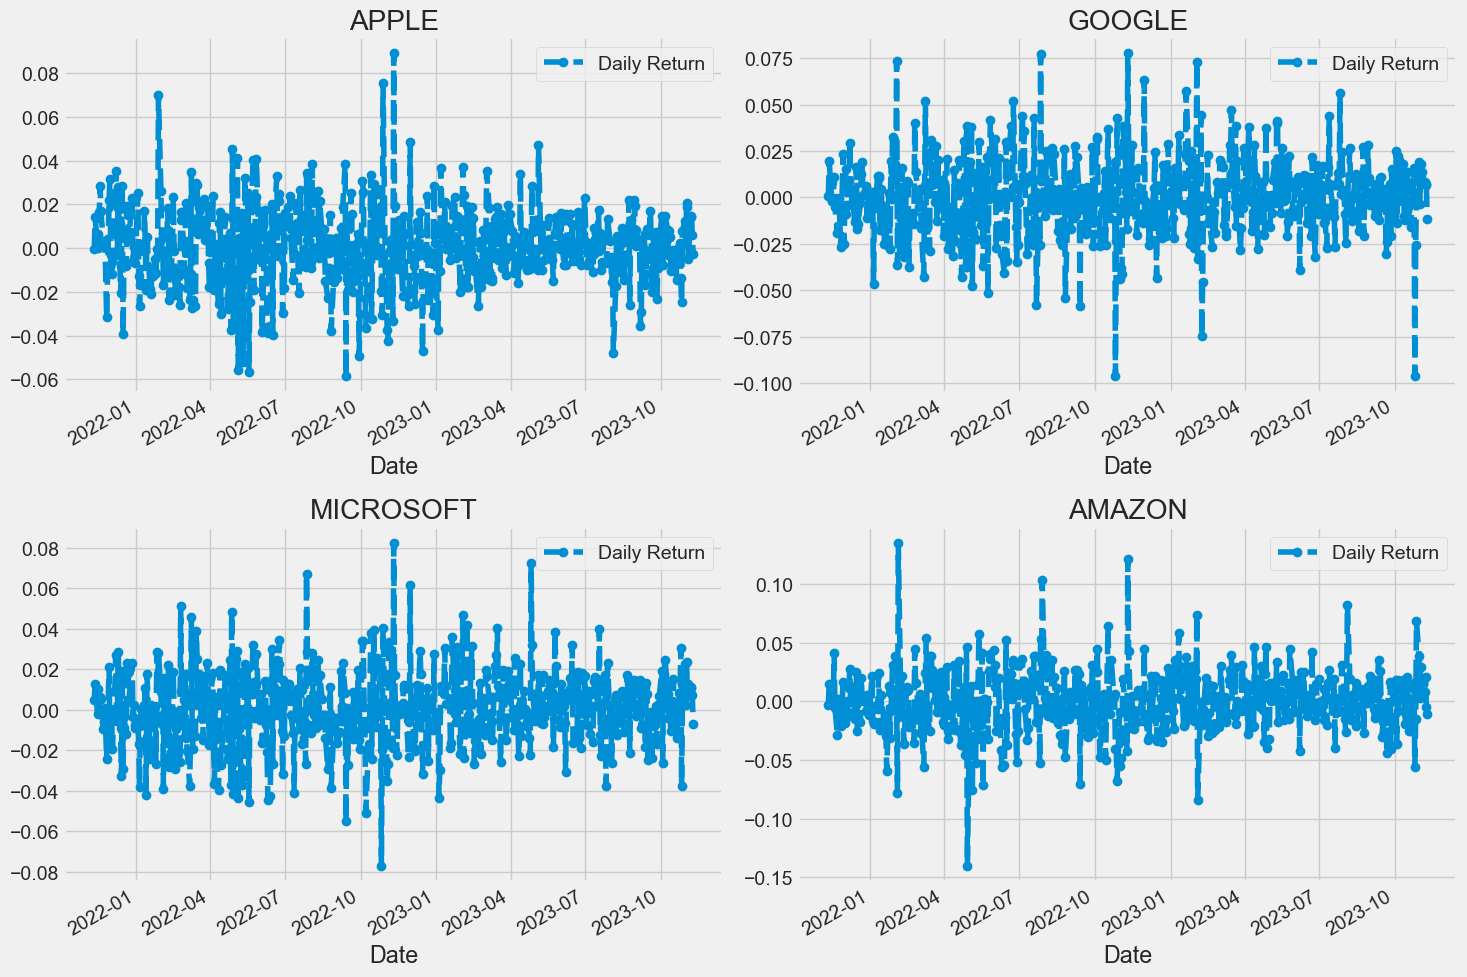

In [32]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL["Daily Return"].plot(ax=axes[0,0], legend=True, linestyle="--", marker="o")
axes[0,0].set_title("APPLE")

GOOG["Daily Return"].plot(ax=axes[0,1], legend=True, linestyle="--", marker="o")
axes[0,1].set_title("GOOGLE")

MSFT["Daily Return"].plot(ax=axes[1,0], legend=True, linestyle="--", marker="o")
axes[1,0].set_title("MICROSOFT")

AMZN["Daily Return"].plot(ax=axes[1,1], legend=True, linestyle="--", marker="o")
axes[1,1].set_title("AMAZON")

fig.tight_layout()

/var/folders/24/z61d72zx27z5ml8twybhwmm40000gn/T/ipykernel_24423/630421589.py:10: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


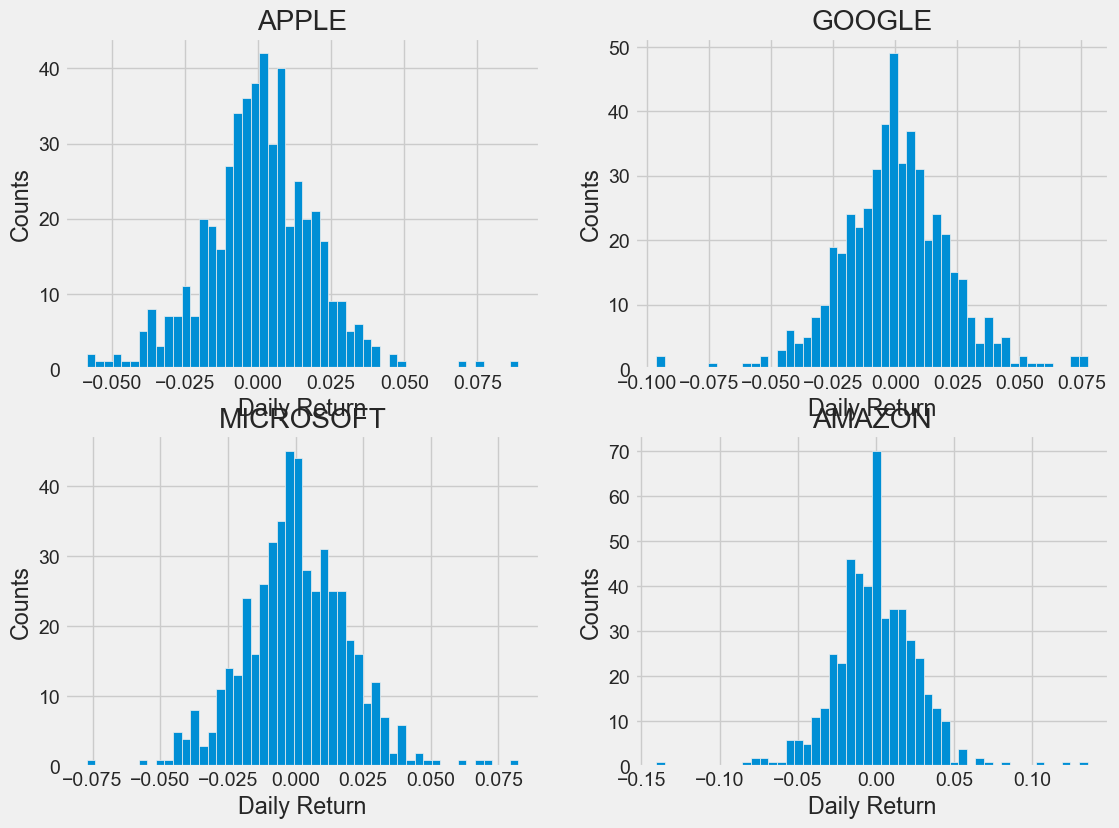

In [33]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Daily Return"].hist(bins=50)
    plt.xlabel("Daily Return")
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")

fig.tight_layout()

### Корреляция стоимости акций

In [34]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head(10)

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-11-10,NaN,NaN,NaN,NaN
2021-11-11,-0.000338,-0.002743,0.000832,0.004928
2021-11-12,0.014337,0.015162,0.019745,0.012905
2021-11-15,0.000067,0.005824,-0.001721,-0.001930
2021-11-16,0.006667,-0.001404,-0.002088,0.010236
2021-11-17,0.016490,0.002344,-0.000094,0.000679
2021-11-18,0.028536,0.041437,0.011049,0.006340
2021-11-19,0.016976,-0.005273,-0.005020,0.005392
2021-11-22,0.002927,-0.028287,-0.019166,-0.009560


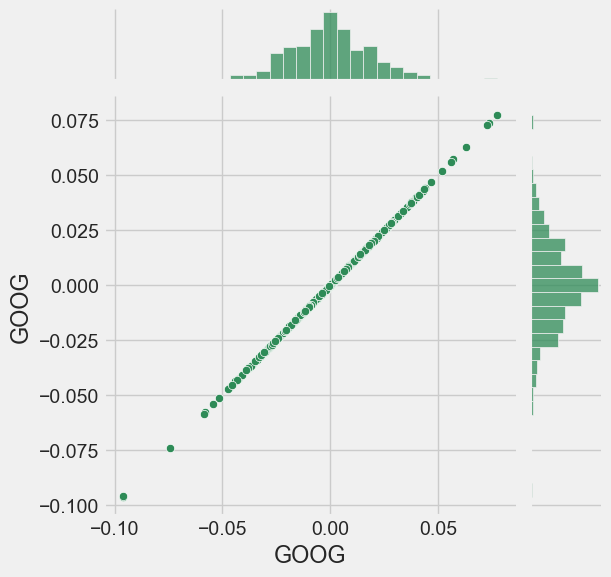

In [36]:
sns.jointplot(x="GOOG", y="GOOG", data=tech_rets, kind="scatter", color="seagreen")

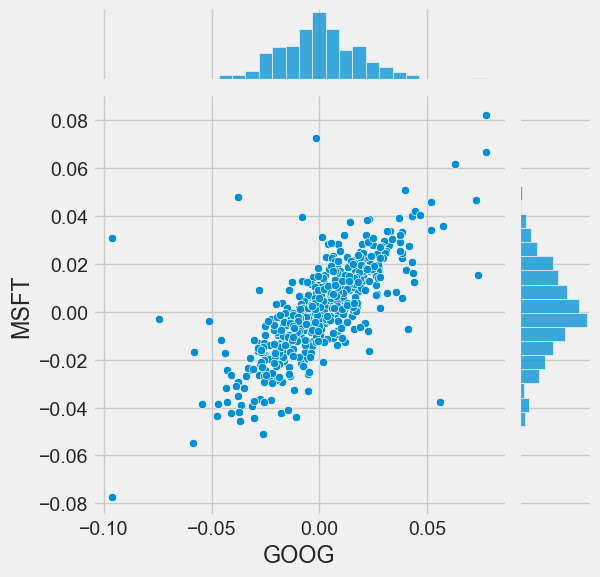

In [37]:
sns.jointplot(x="GOOG", y="MSFT", data=tech_rets, kind="scatter")

/Library/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


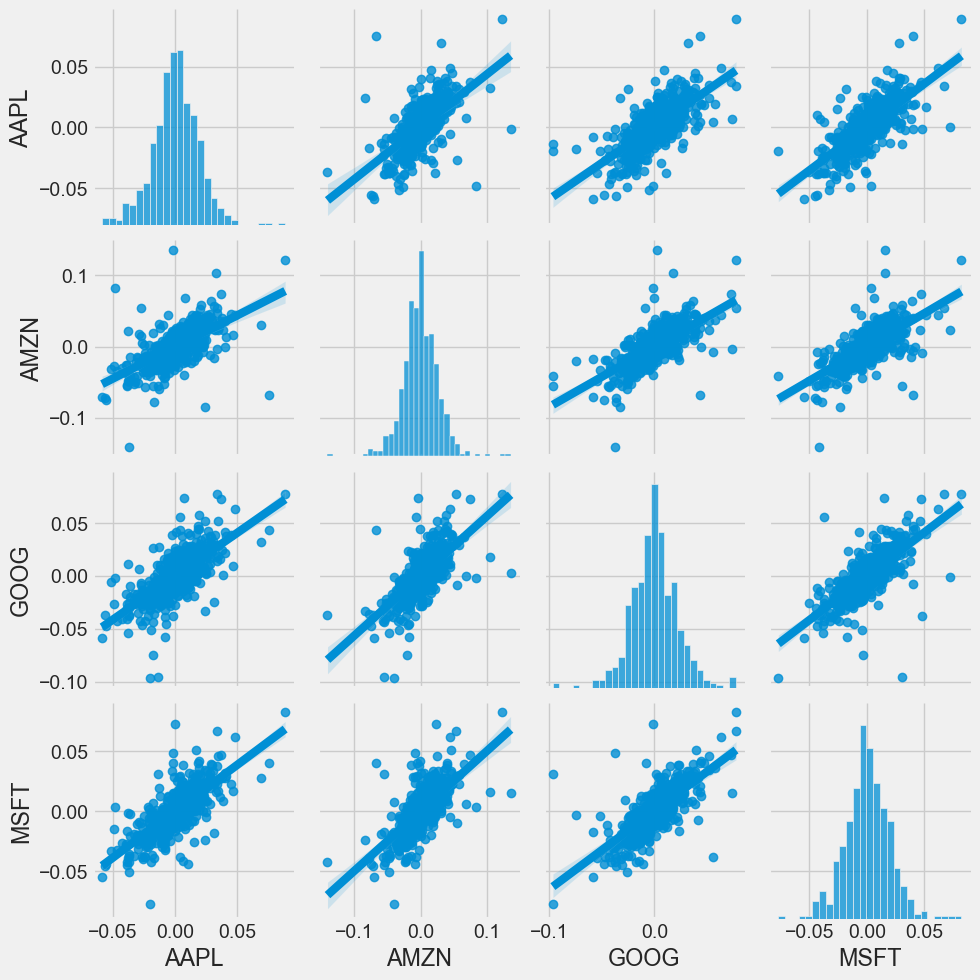

In [38]:
sns.pairplot(tech_rets, kind="reg")

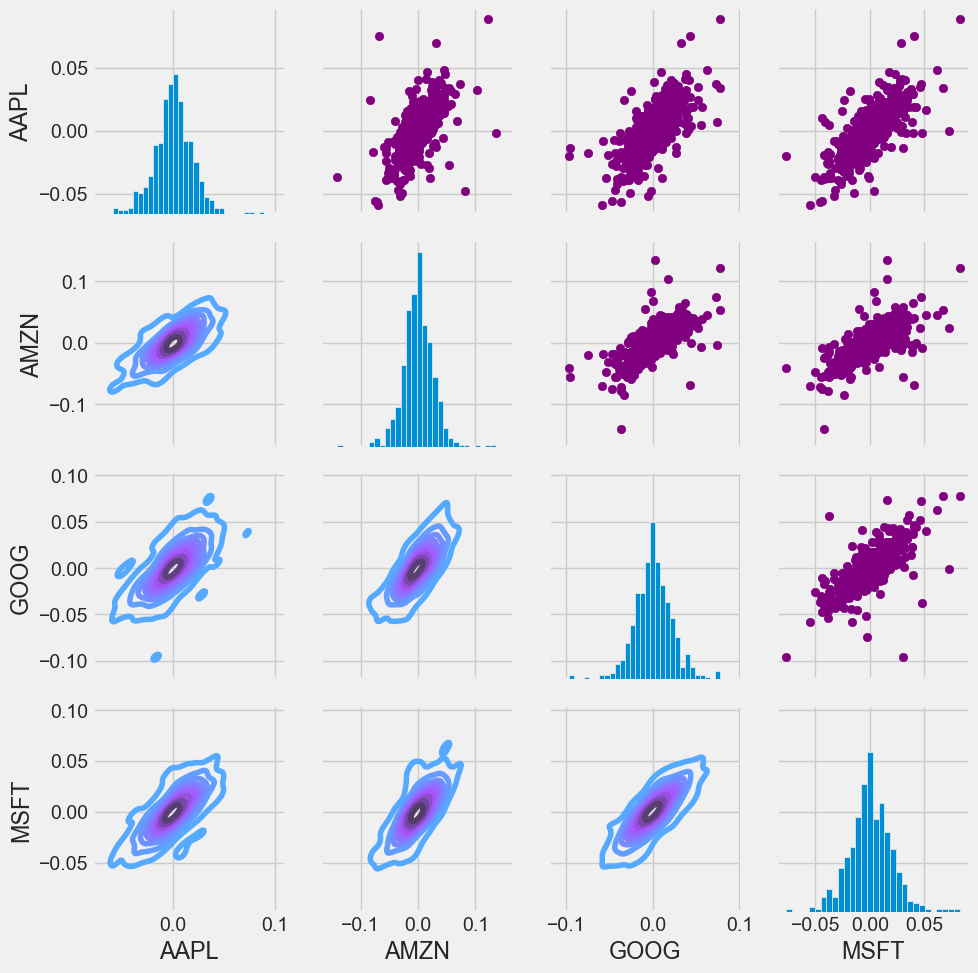

In [41]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color="purple")
return_fig.map_lower(sns.kdeplot, cmap="cool_d")

return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

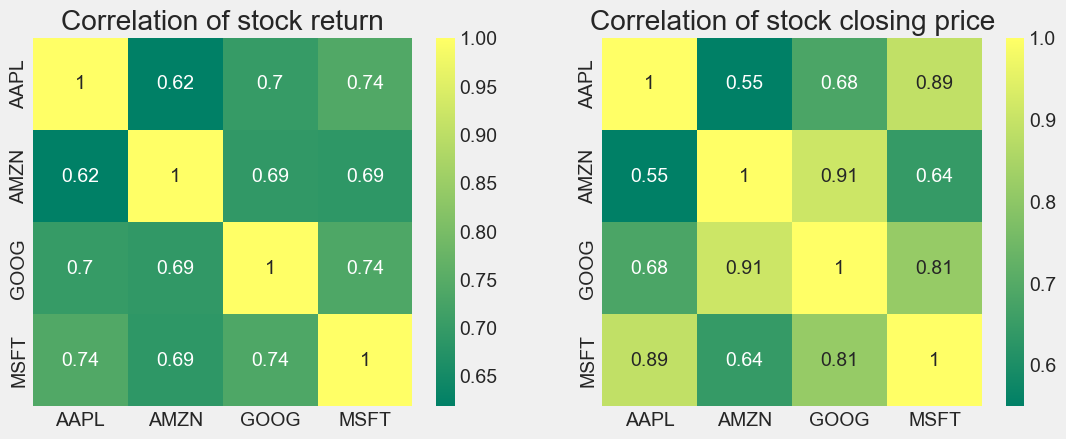

In [43]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap="summer")
plt.title("Correlation of stock return")

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap="summer")
plt.title("Correlation of stock closing price")

### Предсказание данных цены закрытия для компании Apple

In [49]:
df = pdr.get_data_yahoo("AAPL", start="2012-01-01", end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466091,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533084,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672233,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70530000


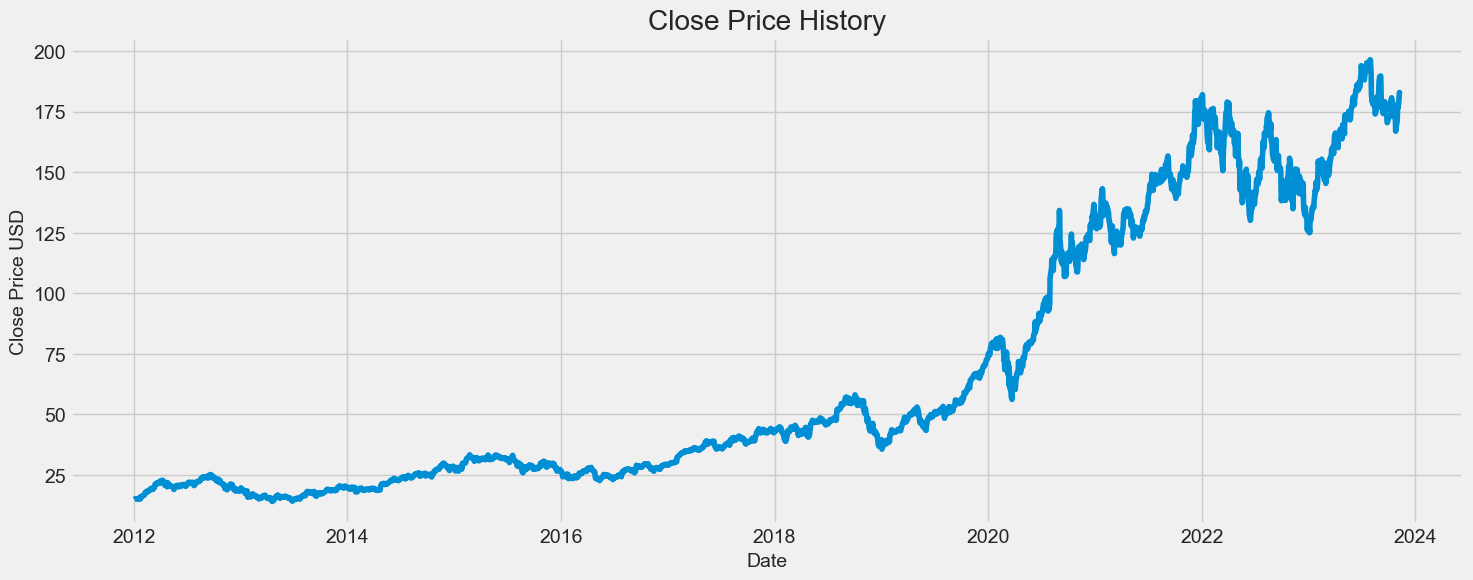

In [50]:
plt.figure(figsize=(16,6))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price USD", fontsize=14)
plt.show()

In [51]:
data = df.filter(["Close"])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.95))

training_data_len

2835

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.91983677],
       [0.92569966],
       [0.92306958]])

In [55]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [59]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Предсказание с использованием LSTM

In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam", loss= "mean_squared_error")

model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2775/2775 [==============================] - 65s 23ms/step - loss: 0.0029
Epoch 2/3
2775/2775 [==============================] - 66s 24ms/step - loss: 0.0020
Epoch 3/3
2775/2775 [==============================] - 64s 23ms/step - loss: 0.0016


In [64]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


5/5 [==============================] - 0s 16ms/step


9.532898577073125

/var/folders/24/z61d72zx27z5ml8twybhwmm40000gn/T/ipykernel_24423/2603199341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


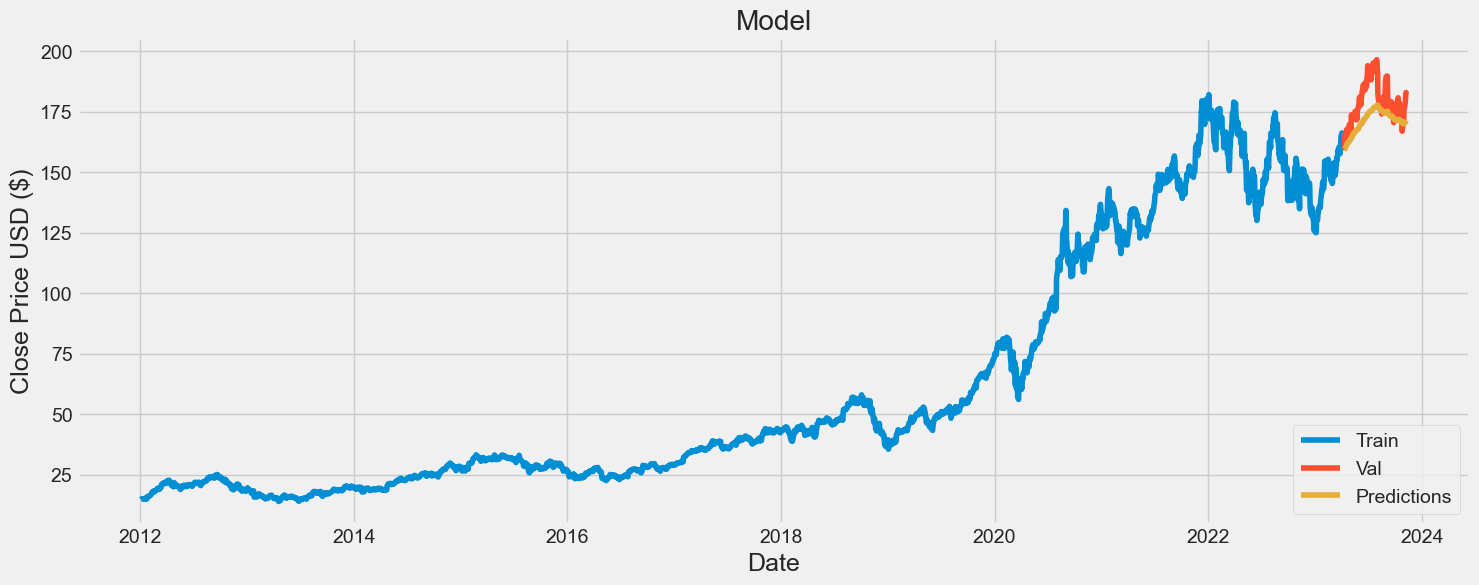

In [65]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()